In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0
Type,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,7.0,7.0,7.0,6.0,7.0
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,CD player,Hands-free equipment,MP3,O..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [6]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## Feature Engineering

In [7]:
df.select_dtypes("object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [8]:
for col in df.select_dtypes('object').columns:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


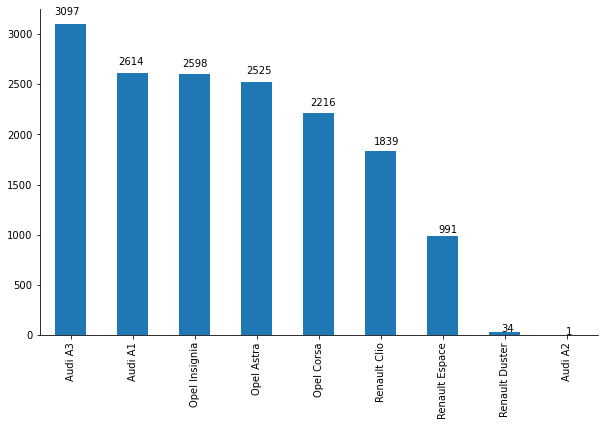

In [9]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [10]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [11]:
#df.drop(index = [2614], inplace = True)

In [12]:
df.shape

(15915, 23)

<AxesSubplot:xlabel='price', ylabel='Count'>

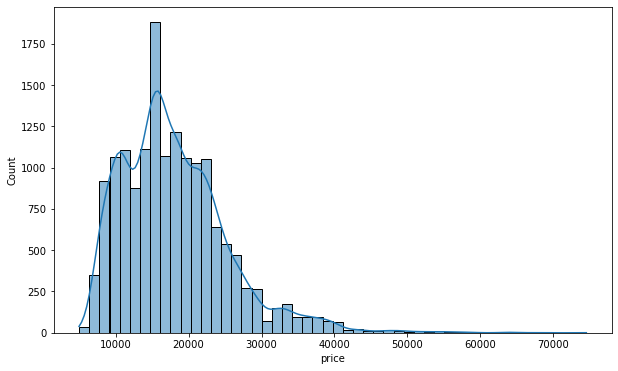

In [13]:
sns.histplot(df.price, bins = 50, kde=True)

In [14]:
skew(df.price)

1.2360529000082296

In [15]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


<AxesSubplot:>

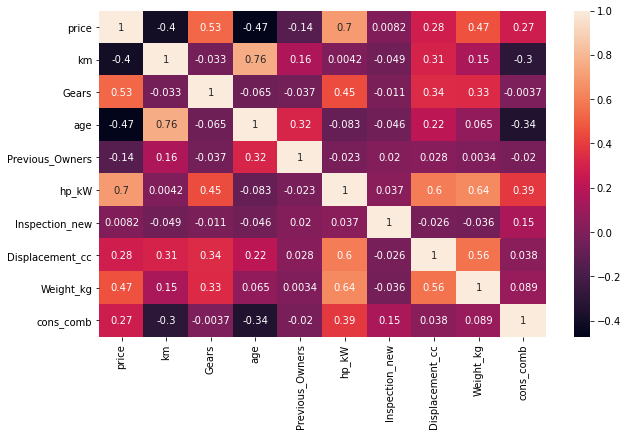

In [16]:
sns.heatmap(df_numeric.corr(), annot=True)

## multicollinearity control

In [17]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [18]:
df_numeric.corr()[(df_numeric.corr() <= -0.9) & (df_numeric.corr() > -1)].any().any()

False

<AxesSubplot:xlabel='price'>

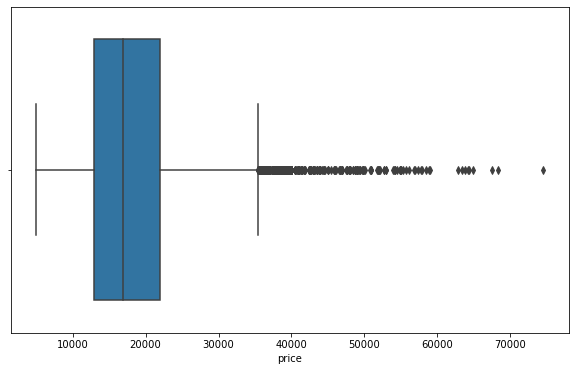

In [19]:
sns.boxplot(df.price)

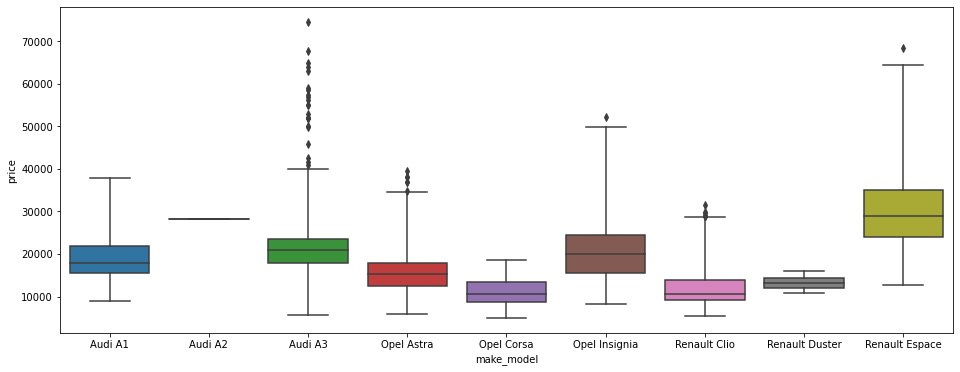

In [20]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [21]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [22]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [23]:
df = pd.get_dummies(df, drop_first =True)

In [24]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,

In [25]:
df.shape

(15915, 134)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Columns: 134 entries, price to Drive_chain_rear
dtypes: float64(8), int64(96), uint8(30)
memory usage: 13.1 MB


In [27]:
df.isnull().any().any()

False

In [28]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.473478
Gearing_Type_Manual                        -0.431675
km                                         -0.399291
make_model_Opel Corsa                      -0.379373
Type_Used                                  -0.366384
make_model_Renault Clio                    -0.297922
Drive_chain_front                          -0.155718
Previous_Owners                            -0.144628
make_model_Opel Astra                      -0.128458
em_CD player                               -0.092684
em_On-board computer                       -0.077418
ss_Central door lock with remote control   -0.070371
ss_Fog lights                              -0.053176
Paint_Type_Perl effect                     -0.049888
ss_Isofix                                  -0.045716
body_type_Sedans                           -0.044334
ss_Central door lock                       -0.043476
ss_Power steering                          -0.041152
Paint_Type_Uni/basic                       -0.

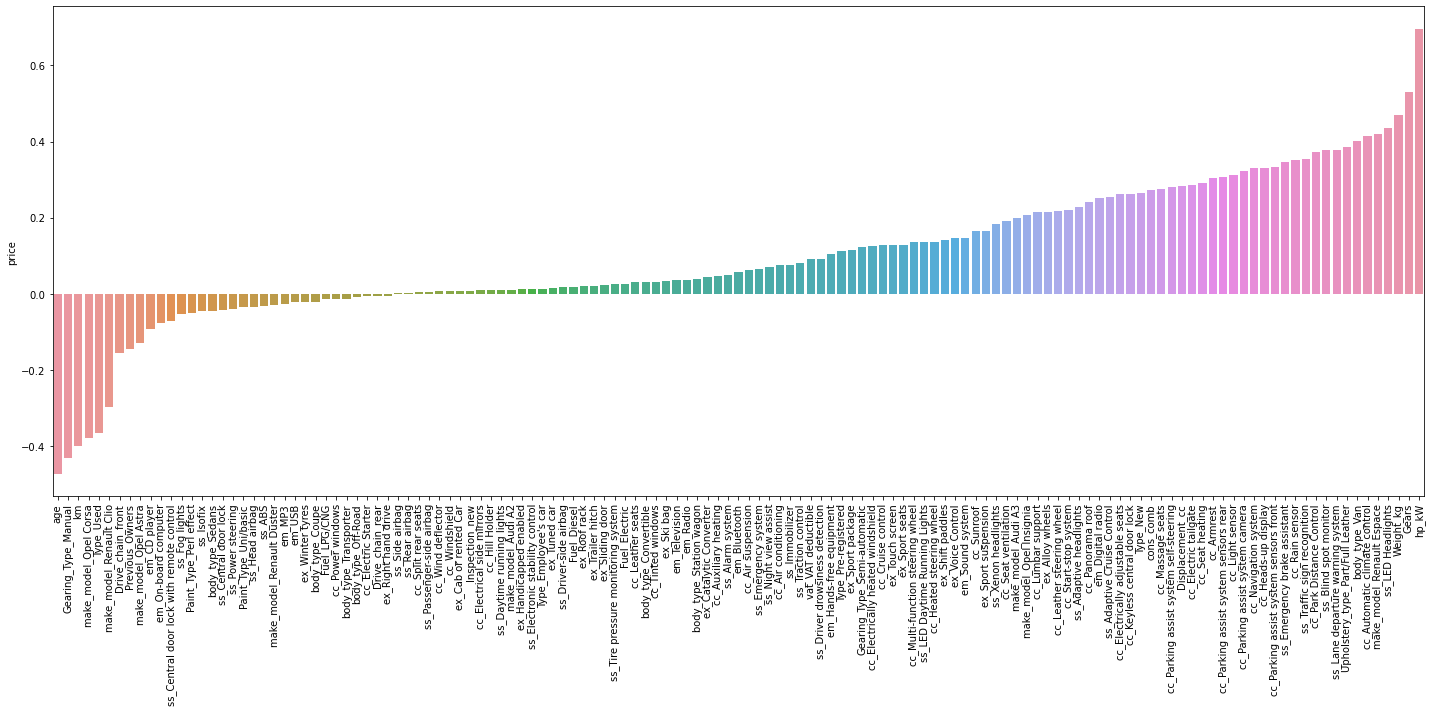

In [29]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Preprocessing

### Train | Test Split

In [30]:
X = df.drop("price", axis =1)
y = df["price"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
X_train.shape

(11140, 133)

In [33]:
X_test.shape

(4775, 133)

In [34]:
y_test.shape

(4775,)

## 3. Implement Linear Regression

In [35]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [36]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lm.predict(X_test)

In [39]:
y_train_pred = lm.predict(X_train)

In [40]:
pd.options.display.float_format = '{:.3f}'.format

In [41]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.892,0.884
mae,1690.359,1728.891
mse,5950667.338,6146427.481
rmse,2439.399,2479.199


## Cross Validate

In [42]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [43]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.109,0.008,0.877,-1785.001,-6849890.604,-2617.230
1,0.125,0.013,0.889,-1682.499,-5898803.020,-2428.745
2,0.103,0.014,0.876,-1685.555,-6351260.702,-2520.171
3,0.074,0.005,0.890,-1802.037,-7339191.559,-2709.094
4,0.063,0.007,0.887,-1718.532,-6407336.669,-2531.272
5,0.067,0.014,0.888,-1681.595,-5763615.774,-2400.753
6,0.081,0.009,0.895,-1645.746,-5380779.771,-2319.651
7,0.064,0.006,0.879,-1814.747,-7322956.353,-2706.096
8,0.063,0.007,0.892,-1677.095,-5601504.833,-2366.750
9,0.094,0.016,0.899,-1678.023,-5234457.674,-2287.894


In [44]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.887
test_neg_mean_absolute_error          -1717.083
test_neg_mean_squared_error        -6214979.696
test_neg_root_mean_squared_error      -2488.766
dtype: float64

In [45]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8844593517169264
MAE 		: 1728.8905042582578
MSE 		: 6146427.481211193
RMSE 		: 2479.198959585776


In [46]:
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Prediction Error

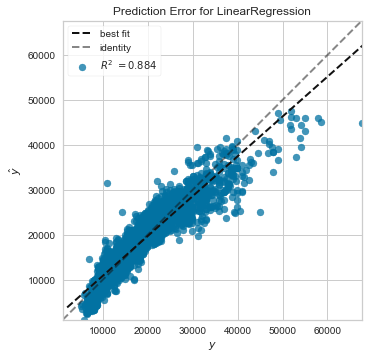

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [47]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

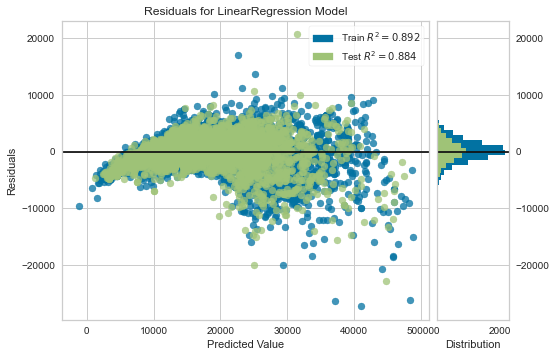

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

In [49]:
df.price.mean()

18024.38058435438

In [50]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [51]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
9738,9940,11295.950,-1355.950
13868,18490,22741.757,-4251.757
5471,24790,23214.306,1575.694
3593,58500,45117.766,13382.234
9394,8989,8896.512,92.488
4011,19370,20809.096,-1439.096
193,17900,20906.972,-3006.972
10108,15290,17793.097,-2503.097
749,22500,25275.914,-2775.914
11147,10950,14812.127,-3862.127


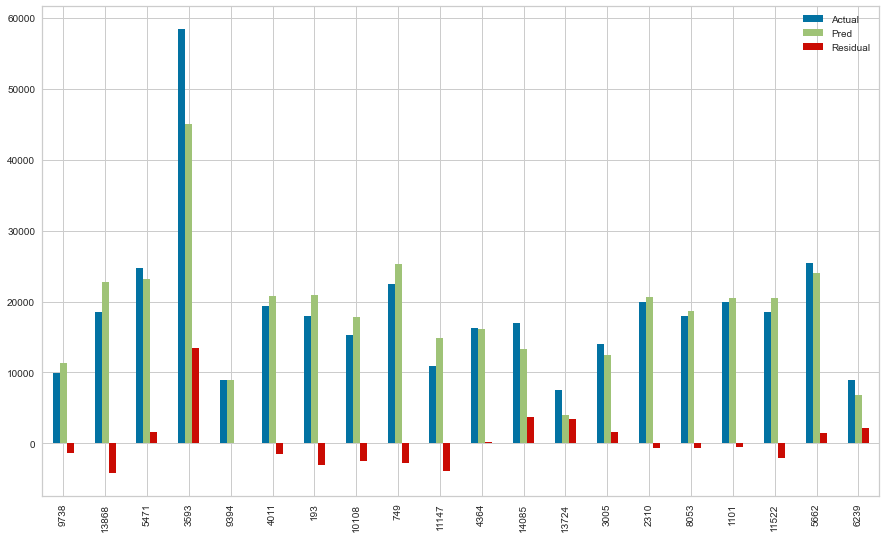

In [52]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [53]:
pd.DataFrame(lm.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-10395.727
make_model_Renault Clio,-5706.166
make_model_Opel Corsa,-5565.700
make_model_Opel Astra,-4230.488
Drive_chain_rear,-3457.037
Type_Employee's car,-2874.386
Type_Used,-2687.660
Type_Pre-registered,-2251.072
Drive_chain_front,-2068.636
make_model_Opel Insignia,-1972.106


## 4. Implement Ridge Regression

## Scaling

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(X_train)

MinMaxScaler()

In [56]:
X_train = scaler.transform(X_train)

In [57]:
X_test = scaler.transform(X_test)

## Ridge

In [58]:
from sklearn.linear_model import Ridge, RidgeCV

In [59]:
ridge_model = Ridge()

In [60]:
ridge_model.fit(X_train, y_train)

Ridge()

In [61]:
y_pred = ridge_model.predict(X_test)

In [62]:
y_train_pred = ridge_model.predict(X_train)

In [63]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.892,0.885
mae,1689.802,1725.810
mse,5957128.515,6126234.914
rmse,2440.723,2475.123


## Finding best alpha for Ridge

In [64]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [65]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')

In [66]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+0...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02]),
        cv=10, scoring='neg_root_mean_squared_error')

In [67]:
ridge_cv_model.alpha_

1.02

In [68]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [69]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.892,0.885
mae,1689.796,1725.770
mse,5957343.017,6126055.591
rmse,2440.767,2475.087


In [70]:
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [71]:
pd.DataFrame(ridge_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11185.514
make_model_Renault Duster,-9401.945
make_model_Renault Clio,-5692.996
make_model_Opel Corsa,-5672.806
age,-4861.333
make_model_Opel Astra,-4178.594
Type_Employee's car,-2847.178
Drive_chain_rear,-2711.768
Type_Used,-2675.544
Type_Pre-registered,-2224.411


## 5. Implement Lasso Regression

In [72]:
from sklearn.linear_model import Lasso, LassoCV

In [73]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [74]:
y_train_pred = lasso_model.predict(X_train)

In [75]:
y_pred = lasso_model.predict(X_test)

In [76]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.885
mae,1693.043,1726.219
mse,5976426.889,6096109.403
rmse,2444.673,2469.030


## Finding best alpha for Lasso

In [77]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train, y_train)

In [78]:
lasso_cv_model.alpha_

1.02

In [79]:
y_train_pred = lasso_cv_model.predict(X_train)

In [80]:
y_pred = lasso_cv_model.predict(X_test)

In [81]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.885
mae,1693.096,1726.189
mse,5977132.726,6095619.441
rmse,2444.818,2468.931


In [82]:
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [83]:
pd.DataFrame(lasso_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11242.445
make_model_Renault Duster,-8966.745
make_model_Renault Clio,-5621.494
make_model_Opel Corsa,-5571.949
age,-4852.184
make_model_Opel Astra,-4176.016
Type_Employee's car,-2760.934
Type_Used,-2617.341
Type_Pre-registered,-2143.438
make_model_Opel Insignia,-1939.235


## 6. Implement Elastic-Net

In [84]:
from sklearn.linear_model import ElasticNet

In [85]:
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

ElasticNet()

In [86]:
y_train_pred = elastic_model.predict(X_train)

In [87]:
y_pred = elastic_model.predict(X_test)

In [88]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.606,0.603
mae,3363.712,3321.074
mse,21700956.060,21118187.386
rmse,4658.428,4595.453


## Finding best alpha and l1_ratio for ElasticNet

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
elastic_model = ElasticNet()

In [91]:
param_grid = {'alpha':[1, 2.03, 3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [92]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [93]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 2.03, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [94]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=1)

In [95]:
y_train_pred = grid_model.predict(X_train)

In [96]:
y_pred = grid_model.predict(X_test)

In [97]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.885
mae,1693.043,1726.219
mse,5976426.889,6096109.403
rmse,2444.673,2469.030


In [98]:
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

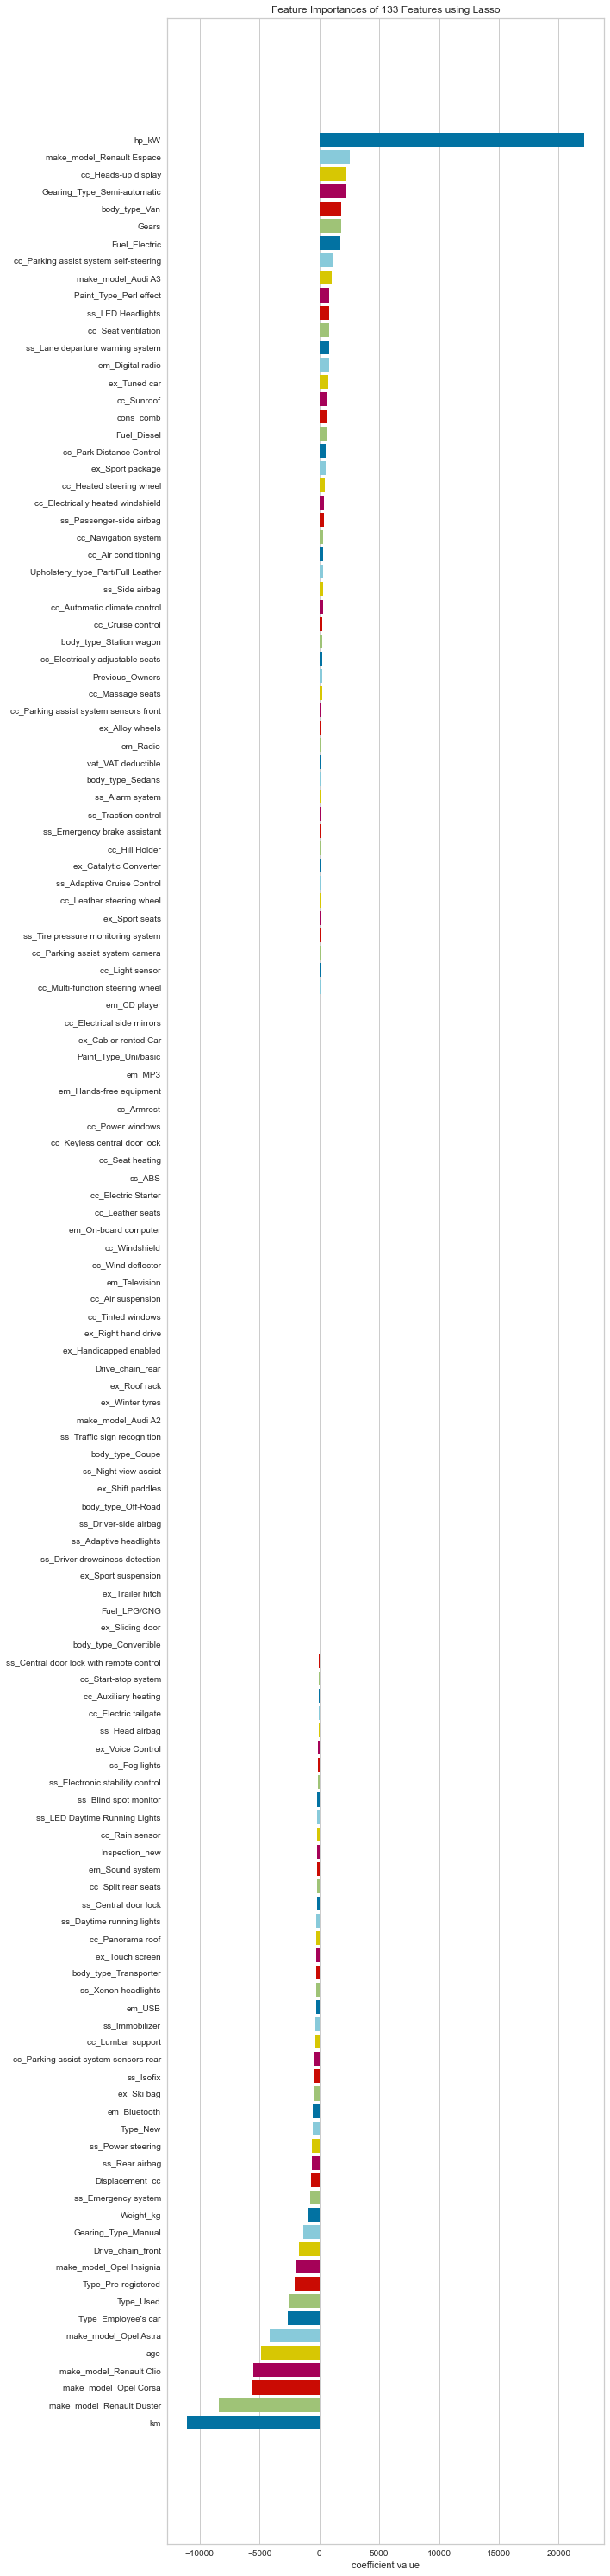

<AxesSubplot:title={'center':'Feature Importances of 133 Features using Lasso'}, xlabel='coefficient value'>

In [99]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=2.03), labels=df.drop(columns="price").columns, relative = False)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [100]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [101]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [163]:
df_new = df[["make_model", "hp_kW", "km","age", "price", "Gearing_Type"]]

In [103]:
df_new

,make_model,hp_kW,km,age,price,Gearing_Type
0,Audi A1,66.000,56013.000,3.000,15770,Automatic
1,Audi A1,141.000,80000.000,2.000,14500,Automatic
2,Audi A1,85.000,83450.000,3.000,14640,Automatic
3,Audi A1,66.000,73000.000,3.000,14500,Automatic
4,Audi A1,66.000,16200.000,3.000,16790,Automatic
...,...,...,...,...,...,...
15910,Renault Espace,147.000,1647.363,0.000,39950,Automatic
15911,Renault Espace,165.000,9900.000,0.000,39885,Automatic
15912,Renault Espace,146.000,15.000,0.000,39875,Automatic
15913,Renault Espace,147.000,10.000,0.000,39700,Automatic


In [104]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make_model    15915 non-null  object 
 1   hp_kW         15915 non-null  float64
 2   km            15915 non-null  float64
 3   age           15915 non-null  float64
 4   price         15915 non-null  int64  
 5   Gearing_Type  15915 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 746.1+ KB


In [105]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,price,Gearing_Type
2614,Audi A2,85.000,26166.000,1.000,28200,Manual


In [106]:
df_new.drop(index=[2614], inplace =True)

In [107]:
df_new = pd.get_dummies(df_new)

In [108]:
df_new

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,147.000,1647.363,0.000,39950,0,0,0,0,0,0,0,1,1,0,0
15911,165.000,9900.000,0.000,39885,0,0,0,0,0,0,0,1,1,0,0
15912,146.000,15.000,0.000,39875,0,0,0,0,0,0,0,1,1,0,0
15913,147.000,10.000,0.000,39700,0,0,0,0,0,0,0,1,1,0,0


In [109]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [164]:
df_new["make_model"].unique().tolist()

['Audi A1',
 'Audi A2',
 'Audi A3',
 'Opel Astra',
 'Opel Corsa',
 'Opel Insignia',
 'Renault Clio',
 'Renault Duster',
 'Renault Espace']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [111]:
scaler = MinMaxScaler()

In [112]:
scaler.fit(X_train)

MinMaxScaler()

In [113]:
X_train = scaler.transform(X_train)

In [114]:
X_test = scaler.transform(X_test)

In [115]:
lasso_final_model = LassoCV(alphas = alpha_space, max_iter = 100000, cv =10)

In [116]:
lasso_final_model.fit(X_train, y_train)

LassoCV(alphas=array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+0...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02]),
        cv=10, max_iter=100000)

In [117]:
lasso_final_model.alpha_

0.01

In [118]:
y_train_pred = lasso_final_model.predict(X_train)
y_pred = lasso_final_model.predict(X_test)

In [119]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.849,0.847
mae,1994.176,1969.005
mse,8434161.700,7892824.150
rmse,2904.163,2809.417


In [120]:
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [121]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.884,1728.891,2479.199
ridge_m,0.885,1725.770,2475.087
lasso_m,0.885,1726.189,2468.931
elastic_m,0.885,1726.219,2469.030
final_m,0.847,1969.005,2809.417


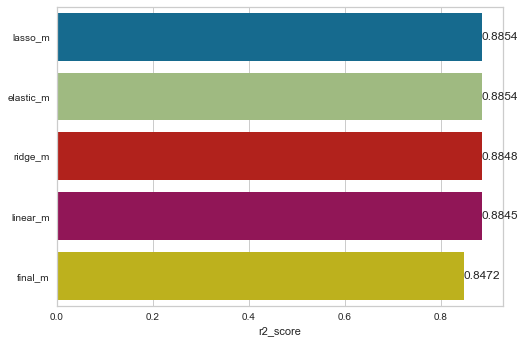

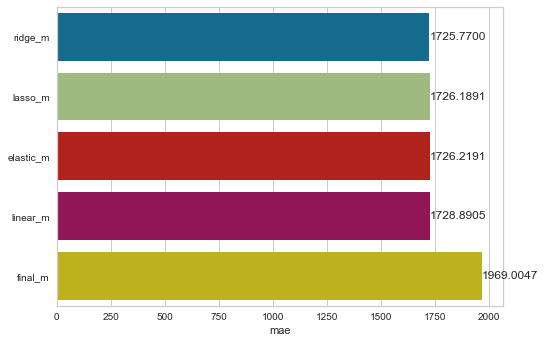

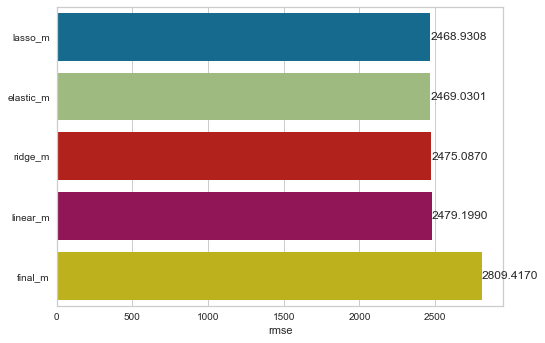

In [122]:
metrics = scores.columns
for i,j in enumerate(metrics):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

In [123]:
columns_name = X.columns

In [124]:
columns_name

Index(['hp_kW', 'km', 'age', 'make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic'],
      dtype='object')

In [148]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [149]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import joblib


pipeline = make_pipeline(MinMaxScaler(),Lasso(alpha=0.01))

finalized_model = pipeline.fit(X, y)

joblib.dump(finalized_model, 'price.model') 
#model = joblib.load('price.model')

['price.model']

In [127]:
final_scaler = MinMaxScaler()

In [128]:
final_scaler.fit(X)

MinMaxScaler()

In [129]:
X = final_scaler.transform(X)

In [130]:
lasso_final_model = Lasso(alpha=0.01)

In [131]:
lasso_final_model.fit(X,y)

Lasso(alpha=0.01)

In [132]:
import joblib

In [133]:
#conda install -c anaconda scikit-learn

In [150]:
my_dict = {
    "hp_kW": 81,
    "age": 2,
    "km": 10000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [151]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,81,2,10000,Audi A3,Automatic


In [152]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,81,2,10000,1,1


In [153]:
my_dict1 = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict1

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,81,10000,2,0,1,0,0,0,0,0,0,1,0,0


In [154]:
my_dict = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,81,10000,2,0,1,0,0,0,0,0,0,1,0,0


In [139]:
columns_name

Index(['hp_kW', 'km', 'age', 'make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic'],
      dtype='object')

In [140]:
# df_new.head()

In [155]:
my_dict = final_scaler.transform(my_dict)

In [156]:
my_dict

array([[0.16141732, 0.03154574, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [157]:
lasso_final_model.coef_

array([27690.45572707, -9978.98769053, -6675.64808799,  2322.54324158,
        3517.45835872, -1848.80392523, -3739.25956461,  1418.48310004,
       -3296.45811801, -6466.13695887,  7458.51068627,  1554.1738503 ,
        -516.77917066,  4234.35465678])

In [144]:
lasso_final_model.intercept_

15712.947141251483

In [158]:
lasso_final_model.predict(my_dict)

array([20489.07195878])

In [159]:
model = joblib.load('price.model')

In [160]:
model.predict(my_dict1)

array([20489.07195878])